In [1]:
# I need to call all the data in the scattering matrices and make them into a HDF5 file
import numpy as np
import h5py
import os
import sys
# Importing the necessary libraries
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks.network_factory import generate_network
from matplotlib import pyplot as plt
import json

KeyError: '31'

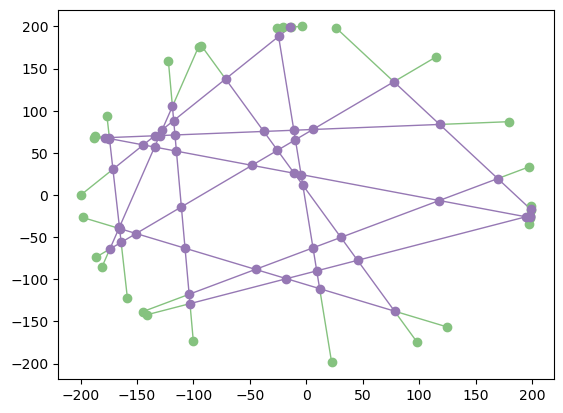

In [5]:
network_type = 'buffon'
network_shape = 'circular'

network_spec = NetworkSpec(network_type=network_type,
                            network_shape=network_shape)

network = generate_network(network_spec)
network.draw()
print(network.get_S_ee(1.0))

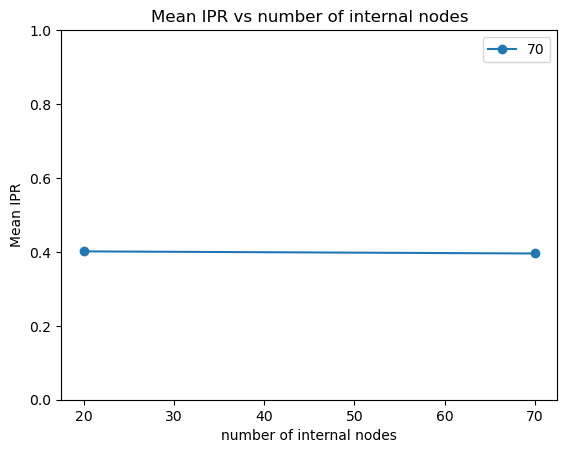

In [ ]:
# network_type = 'delaunay'
# network_shape = 'circular'
# random_seed = 5
# num_internal_nodes = 3
# num_external_nodes = 3
# num_seed_nodes = None
# network_size = 200e-6
# external_size = 250e-6
# external_offset = 0.0

# network_spec = NetworkSpec(network_type=network_type,
#                             network_shape=network_shape,
#                             random_seed=random_seed,
#                             num_internal_nodes=num_internal_nodes,
#                             num_external_nodes=num_external_nodes,
#                             num_seed_nodes=num_seed_nodes,
#                             network_size=network_size,
#                             external_size=external_size,
                            # external_offset=external_offset)
d = []
Ni = [20,70]
for ni in Ni:   
    with h5py.File(f'scattering_ensemble_del_slab_{ni}_10.h5', 'r') as h5file:
        Mean_ipr = []
        for i in range(0,len(h5file['S_ee']['completed'])):
            data = h5file['S_ee'][f'matrix_{i}'][:]
            eig,vec = np.linalg.eig(data)
            ipr = np.sum(np.abs(vec)**4,axis=0)
            mean_ipr = np.mean(ipr)
            Mean_ipr.append(mean_ipr)
        Mean_ipr = np.array(Mean_ipr)
        d.append(np.mean(Mean_ipr))

plt.plot(Ni,d,marker="o",label=f'{ni}')
plt.ylim(0,1)
plt.legend()
plt.xlabel('number of internal nodes')
plt.ylabel('Mean IPR')
plt.title('Mean IPR vs number of internal nodes')
plt.show()

(94, 94)
(188, 20)
(20, 20)


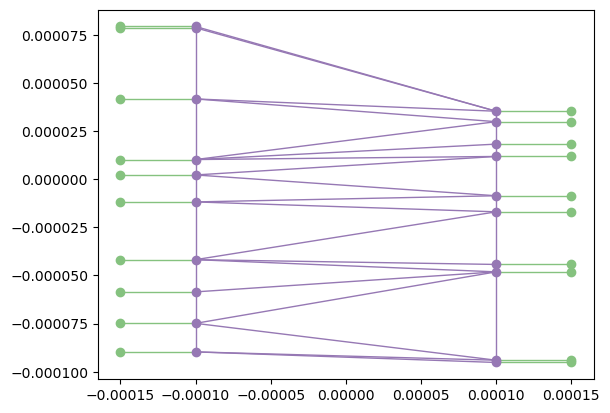

In [11]:
network_type = 'delaunay'
network_shape = 'slab'
random_seed = 3
num_internal_nodes = 20
num_external_nodes = 10
num_seed_nodes = None
network_size = (200e-6,200e-6)
external_size = 250e-6
external_offset = 50e-6

network_spec = NetworkSpec(network_type=network_type,
                            network_shape=network_shape,
                            random_seed=random_seed,
                            num_internal_nodes=num_internal_nodes,
                            num_external_nodes=num_external_nodes,
                            num_seed_nodes=num_seed_nodes,
                            network_size=network_size,
                            external_size=external_size,
                            external_offset=external_offset)

network = generate_network(network_spec)
network.draw()
S_ii = network.get_S_ii(1.0)
S_ie = network.get_S_ie(1.0)
S_ee = network.get_S_ee(1.0)
print(S_ii.shape)
print(S_ie.shape)
print(S_ee.shape)
# help(network)


(188, 20)


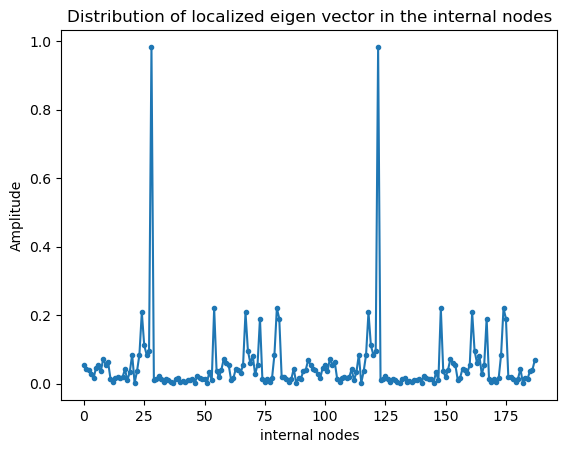

In [3]:
# ni=70
ni=20
with h5py.File(f'/home/baruva/scattering_data/del_slab/scattering_ensemble_del_slab_{ni}_10.h5', 'r') as h5file:
    S_ee_data = h5file['S_ee'][f'matrix_3'][:]
    eig,vec = np.linalg.eig(S_ee_data)
    ipr = np.sum(np.abs(vec)**4,axis=0)
    a = np.where(ipr>0.9)
    loc_vec = vec[:,a[0][0]]
    
    # We have to find how the this localized eigen vector is distributed in the network
    S_ie_data = h5file['S_ie'][f'matrix_3'][:]
    print(S_ie_data.shape)

    internal_distribution = np.dot(S_ie_data,loc_vec)
    plt.plot(np.abs(internal_distribution),marker="o",markersize=3)
    plt.xlabel('internal nodes')
    plt.ylabel('Amplitude')
    plt.title('Distribution of localized eigen vector in the internal nodes')
    plt.show()

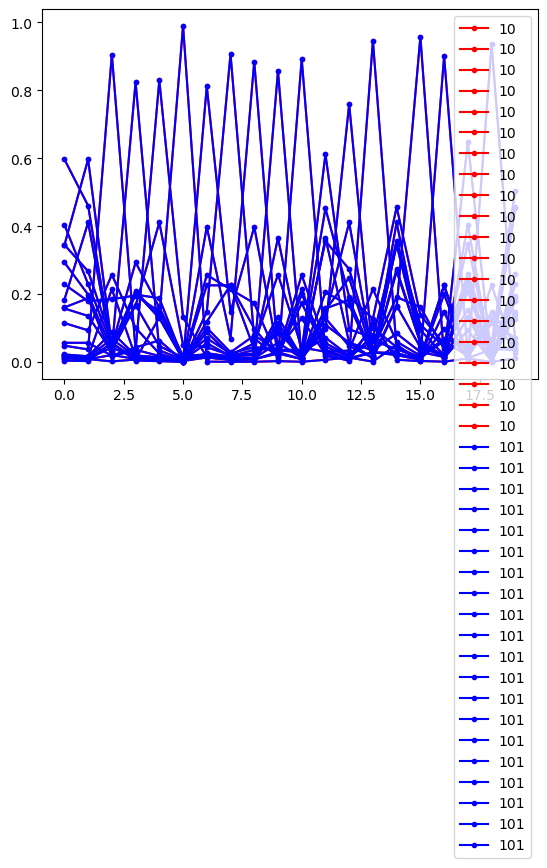

In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
with h5py.File(f'scattering_ensemble_del_slab_20_10.h5','r') as h5file:
    S_ee_data = h5file['S_ee'][f'matrix_3'][:]
with h5py.File(f'scattering_ensemble_del_slab_20_101.h5','r') as h5file:
    S_ee_data1 = h5file['S_ee'][f'matrix_3'][:]

plt.plot(np.abs(S_ee_data),c='r',marker="o",markersize=3,label='10')
plt.plot(np.abs(S_ee_data1),c='b',marker="o",markersize=3,label='101')
plt.legend()